In [12]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np


In [13]:
def get_mfccs(soundFiles):
    sr = 44100
    mfccs = []
    delta_mfccs = []
    delta2_mfccs = []
    for soundFile in soundFiles:
        y, sr = librosa.load(soundFile, sr=sr)
        mfcc = librosa.feature.mfcc(y, n_mfcc=13, sr=sr)
        mfccs.append(mfcc)
        delta_mfccs.append(librosa.feature.delta(mfcc, mode="nearest"))
        delta2_mfccs.append(librosa.feature.delta(mfcc, mode="nearest", order=2))
    return mfccs, delta_mfccs, delta2_mfccs

In [14]:
def drawSpecs(specList, name):
    for stft in range(0, len(specList), 3):
        fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15,3))
        img1 = librosa.display.specshow(librosa.amplitude_to_db(specList[stft], ref=np.max), y_axis='log', x_axis='time', ax=ax1)
        ax1.set_title(name + str(stft))
        fig.colorbar(img1, ax=ax1, format="%+2.0f dB")
        
        if (stft+1 < len(specList)):
            img2 = librosa.display.specshow(librosa.amplitude_to_db(specList[stft+1], ref=np.max), y_axis='log', x_axis='time', ax=ax2)
            ax2.set_title(name + str(stft+1))
            fig.colorbar(img2, ax=ax2, format="%+2.0f dB")

        if (stft+2 < len(specList)):
            img3 = librosa.display.specshow(librosa.amplitude_to_db(specList[stft+2], ref=np.max), y_axis='log', x_axis='time', ax=ax3)
            ax3.set_title(name + str(stft+2))
            fig.colorbar(img3, ax=ax3, format="%+2.0f dB")


In [15]:
soundFiles = [
    '../assets/example_transients/4.wav',
    '../assets/example_transients/6.wav',
    '../assets/example_transients/1.wav',
    '../assets/example_transients/11.wav',
    '../assets/example_transients/13.wav',
    '../assets/example_transients/9.wav',
    '../assets/example_transients/3.wav',
    '../assets/example_transients/7.wav',
    '../assets/example_transients/12.wav',
    '../assets/example_transients/2.wav',
    '../assets/example_transients/5.wav',
    '../assets/example_transients/10.wav',
    '../assets/example_transients/8.wav'
]
mfccs, delta_mfccs, delta2_mfccs = get_mfccs(soundFiles)

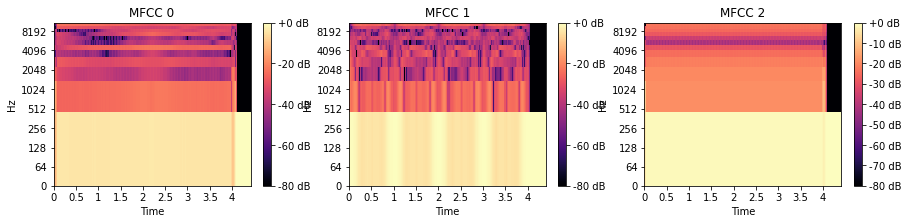

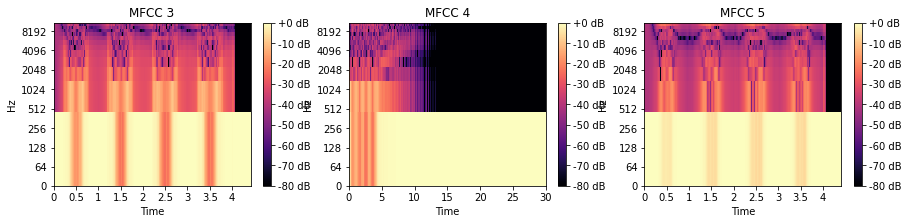

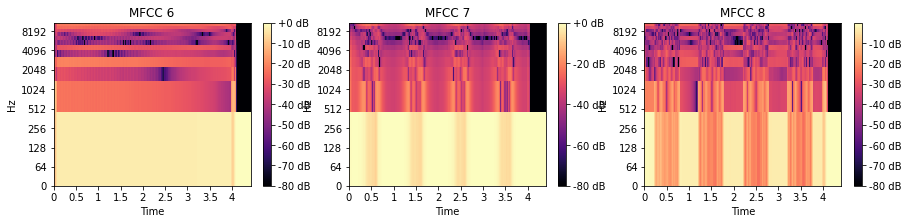

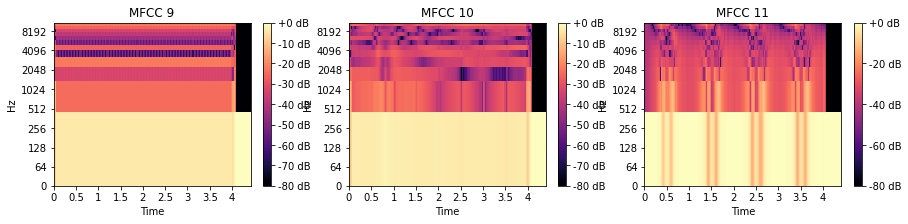

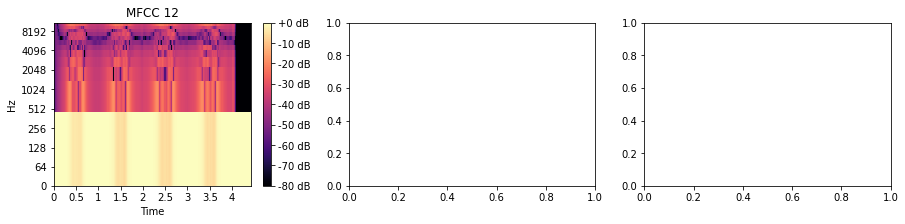

In [16]:
drawSpecs(mfccs, "MFCC ")

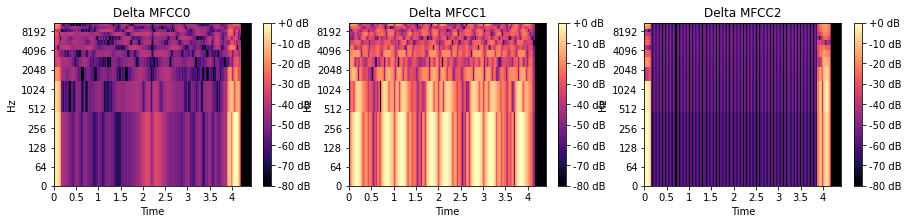

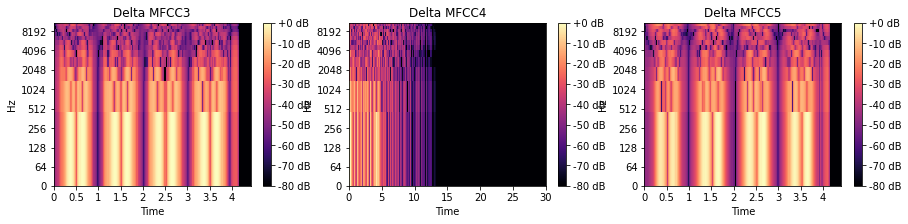

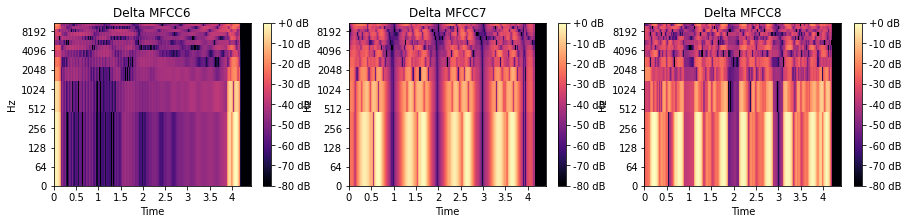

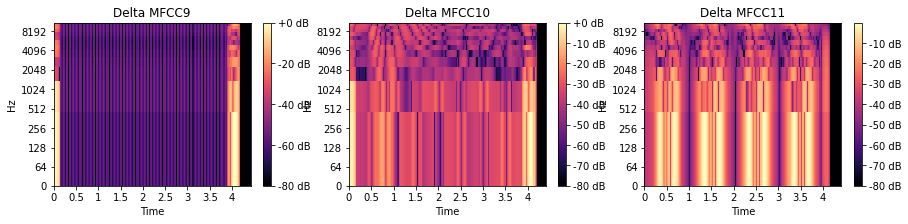

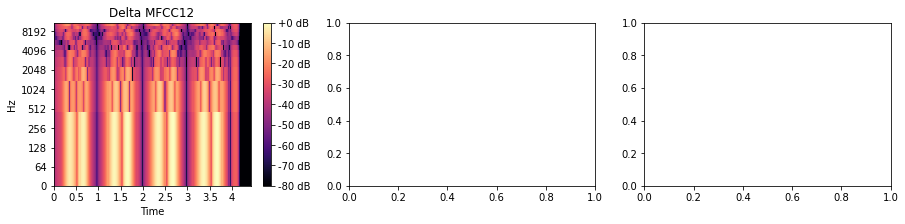

In [17]:
drawSpecs(delta_mfccs, "Delta MFCC")

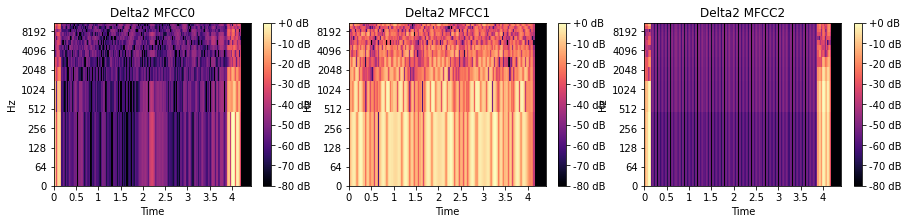

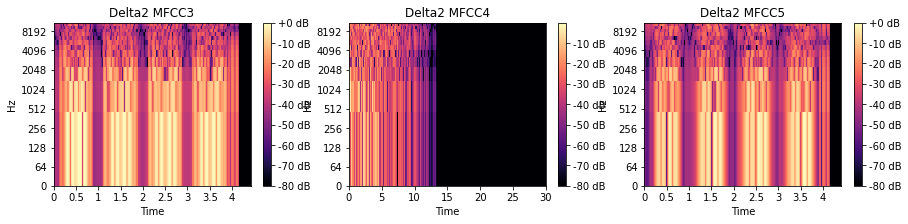

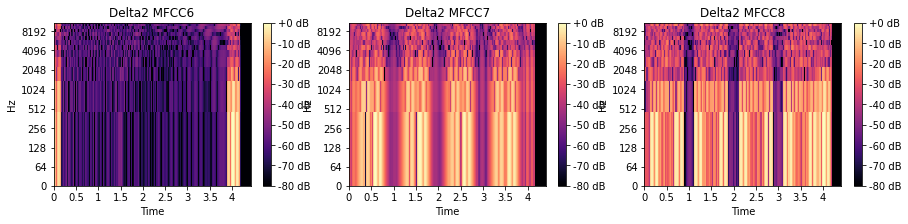

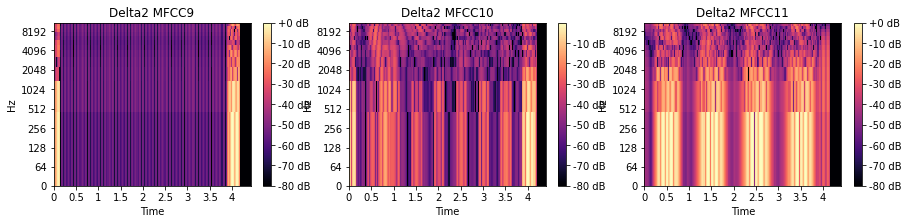

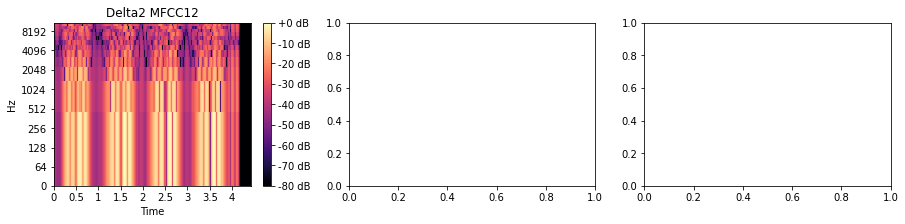

In [18]:
drawSpecs(delta2_mfccs, "Delta2 MFCC")

In [19]:
soundFiles = [f"../assets/example_transients/{num}.wav" for num in range(1,14)]
mfccs, delta_mfccs, delta2_mfccs = get_mfccs(soundFiles)

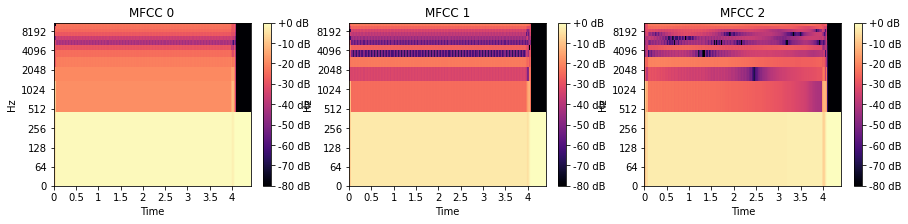

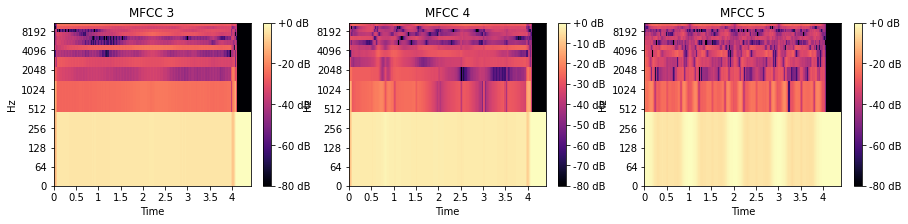

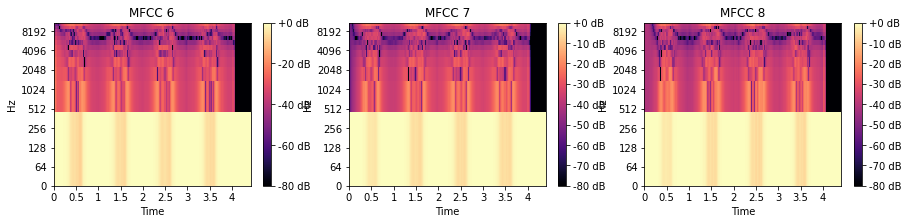

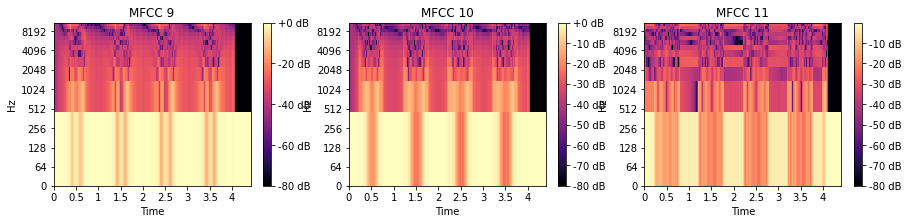

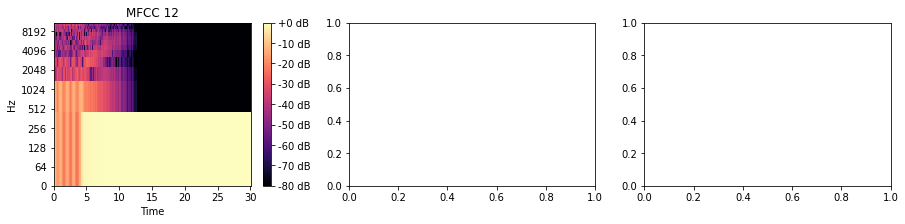

In [20]:
drawSpecs(mfccs, "MFCC ")

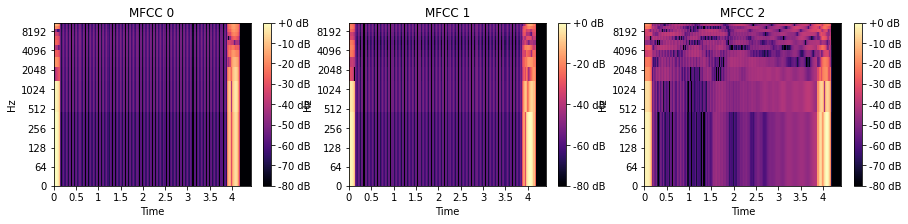

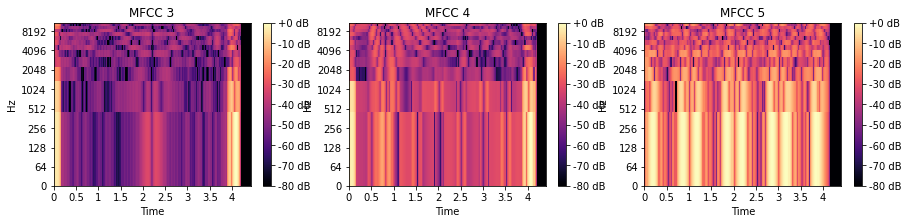

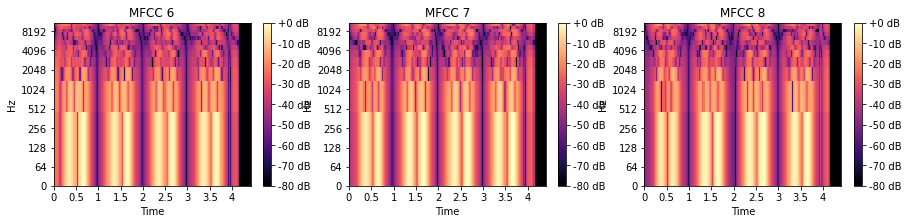

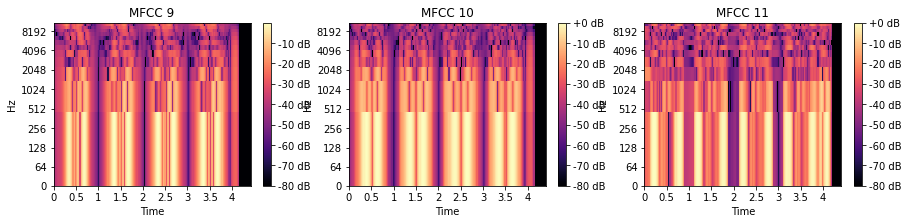

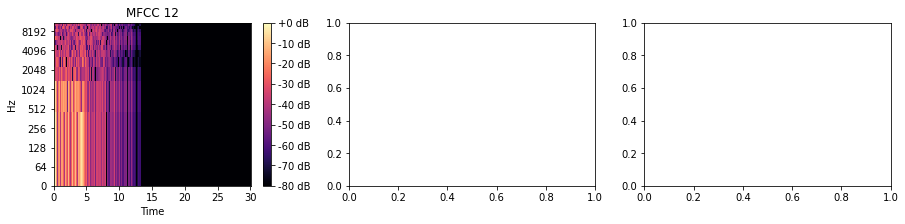

In [21]:
drawSpecs(delta_mfccs, "MFCC ")

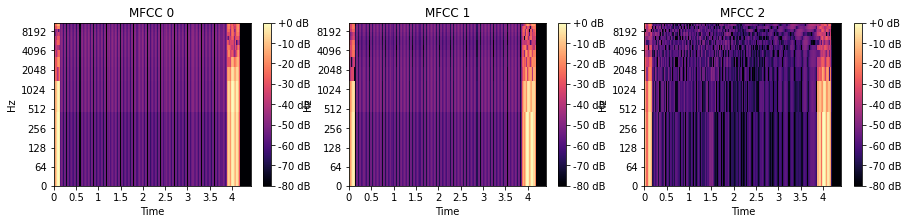

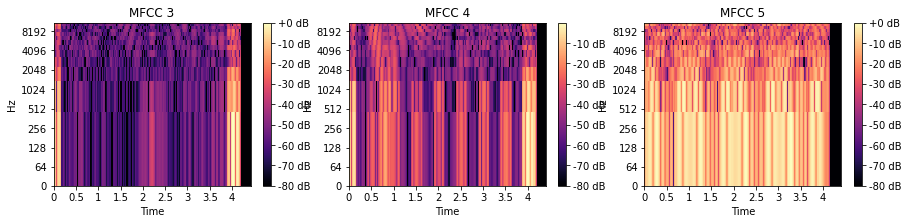

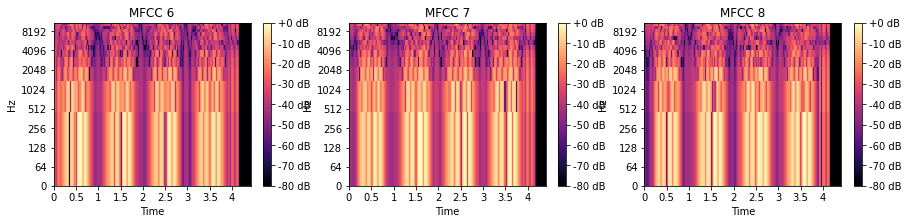

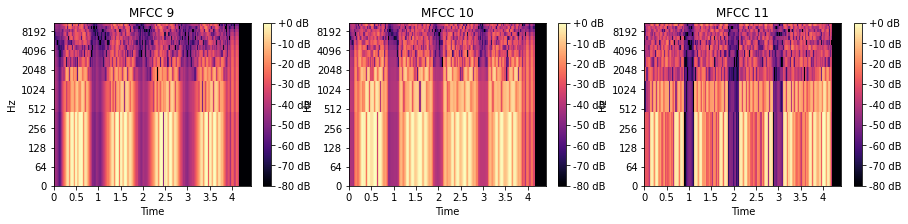

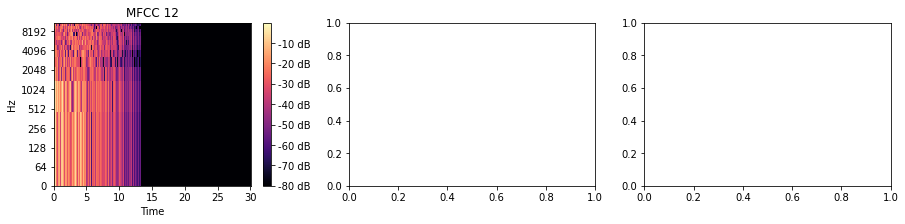

In [22]:
drawSpecs(delta2_mfccs, "MFCC ")